<a href="https://colab.research.google.com/github/JoeArias1982/HW1/blob/main/asset_v1_UTAustinX%2BCSMS_ML_311%2B2T2023a%2Btype_asset%2Bblock_hw1_programming_base_notebook_u2izxwcYFp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [141]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [142]:
# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
x = cancer.data  # Feature matrix
y = cancer.target  # Target vector

# Print the shapes of x and y
print("Shape of feature matrix (x):", x.shape)
print("Shape of target vector (y):", y.shape)

Shape of feature matrix (x): (569, 30)
Shape of target vector (y): (569,)


In [143]:
# Count the number of benign and malignant cases
benign_count = pd.DataFrame(y).value_counts()[1]
malignant_count = pd.DataFrame(y).value_counts()[0]

# Print the counts
print(f"There are {benign_count} benign cases and {malignant_count} malignant cases.")


There are 357 benign cases and 212 malignant cases.


In [144]:
def calculate_base_rate(malignant_count, total_cases):
    base_rate = malignant_count / total_cases
    return base_rate

# Calculate the total number of cases
total_cases = len(y)

# Calculate the base rate
base_rate = calculate_base_rate(malignant_count, total_cases)
print(f"The base rate of malignant cancer occurrence is: {base_rate:.2%}")


The base rate of malignant cancer occurrence is: 37.26%


If the base rate is 30%, then my best guess for the probability of malignant cancer for a single example is 30%.

## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


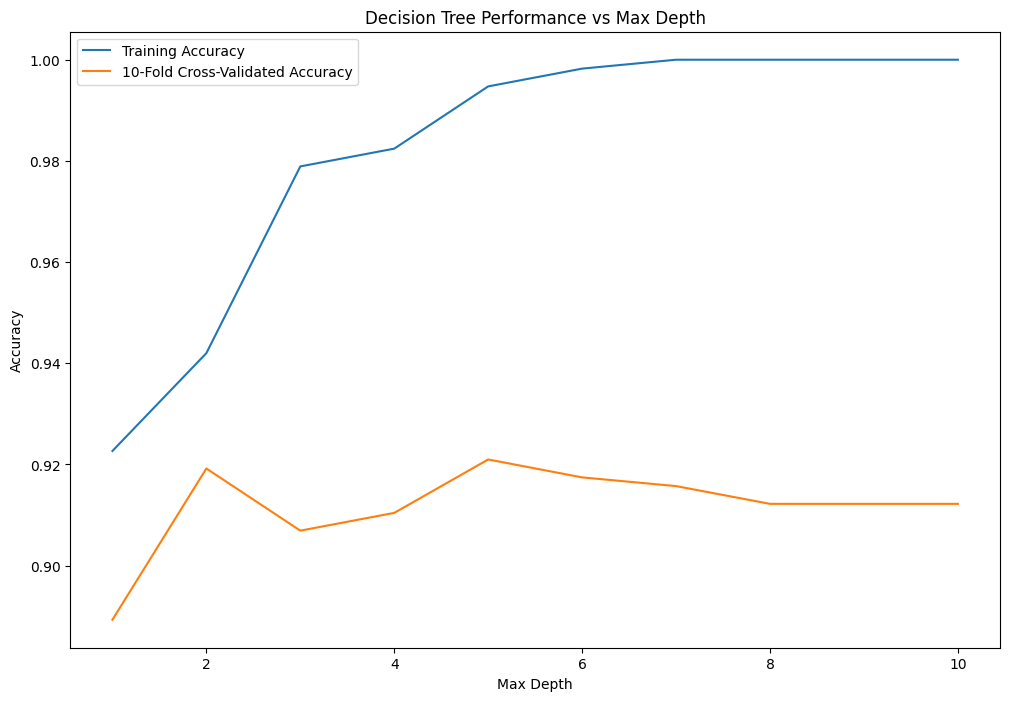

In [145]:
# Vary max depth from 1 to 10
max_depth_values = np.arange(1, 11)

# Lists to store accuracy scores
training_accuracies = []
cross_val_accuracies = []

# Set random seed for reproducibility
seed = RANDOM_STATE

# Iterate over max_depth values
for max_depth in max_depth_values:
    # Create DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)

    # Evaluate on full dataset
    clf.fit(x, y)
    training_accuracy = clf.score(x, y)
    training_accuracies.append(training_accuracy)

    # Evaluate with 10-fold cross-validation
    cross_val_accuracy = np.mean(cross_val_score(clf, x, y, cv=10))
    cross_val_accuracies.append(cross_val_accuracy)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depth_values, training_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, cross_val_accuracies, label='10-Fold Cross-Validated Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.show()

In [146]:
# Find the max_depth value(s) with the highest training accuracy
best_max_depths = [max_depth_values[i] for i, acc in enumerate(training_accuracies) if acc == max(training_accuracies)]

print(f"The best setting(s) for max_depth with respect to full-dataset accuracy: {best_max_depths}")


The best setting(s) for max_depth with respect to full-dataset accuracy: [7, 8, 9, 10]


In [147]:
# Find the max_depth value(s) with the highest cross-validated accuracy
best_max_depths_cross_val = [max_depth_values[i] for i, acc in enumerate(cross_val_accuracies) if acc == max(cross_val_accuracies)]

print(f"The best setting(s) for max_depth with respect to cross-validated accuracy: {best_max_depths_cross_val}")


The best setting(s) for max_depth with respect to cross-validated accuracy: [5]


### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** To determine the setting of max_depth that gave the best accuracy with respect to the full-dataset accuracy, you can examine the results stored in the training_accuracies list. Find the max_depth value(s) corresponding to the highest accuracy. Also, you can use the following code:

best_max_depths = [max_depth_values[i] for i, acc in enumerate(training_accuracies) if acc == max(training_accuracies)]

print(f"The best setting(s) for max_depth with respect to full-dataset accuracy: {best_max_depths}")



#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:**
To determine the setting of max_depth that gave the best accuracy with respect to cross-validated accuracy, you can examine the results stored in the cross_val_accuracies list. Find the max_depth value(s) corresponding to the highest cross-validated accuracy. (5)

Also, you can use the following code:

best_max_depths_cross_val = [max_depth_values[i] for i, acc in enumerate(cross_val_accuracies) if acc == max(cross_val_accuracies)]

print(f"The best setting(s) for max_depth with respect to cross-validated accuracy: {best_max_depths_cross_val}")




## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

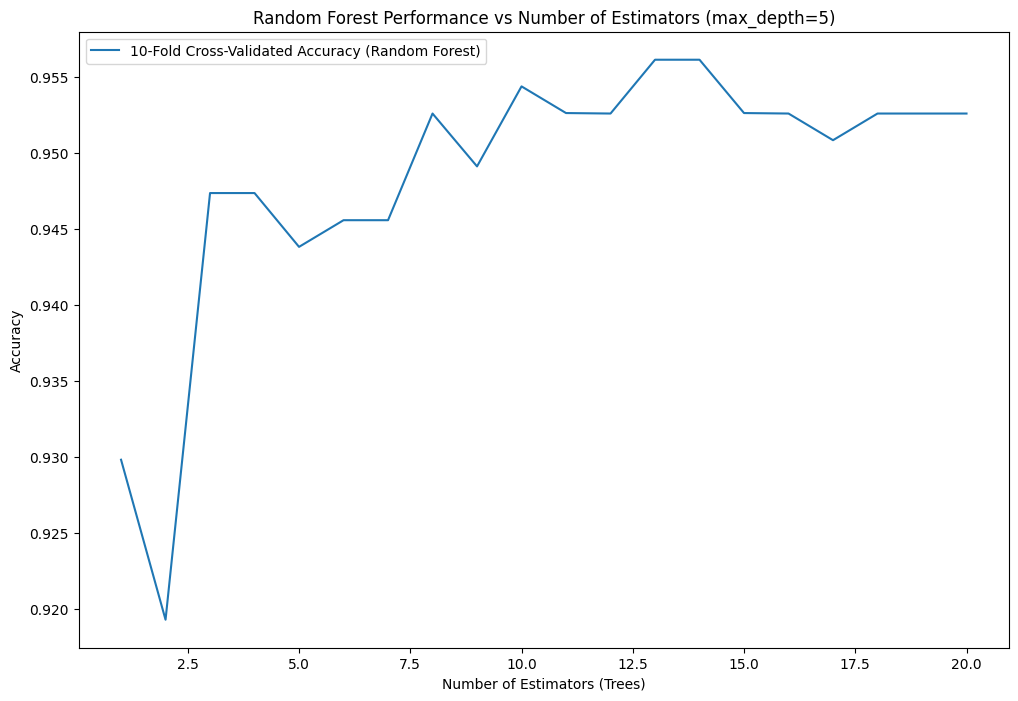

In [148]:
# Best max_depth from previous analysis
best_max_depth =  best_max_depths_cross_val[0]

# Vary n_estimators from 1 to 20
n_estimators_values = np.arange(1, 21)

# List to store cross-validated accuracies
cross_val_accuracies_rf = []

# Set random seed for reproducibility
seed = 10

# Create Random Forest Classifier with the best max_depth
rf_classifier = RandomForestClassifier(max_depth=best_max_depth, random_state=seed)

# Iterate over n_estimators values
for n_estimators in n_estimators_values:
    # Set the current n_estimators value
    rf_classifier.set_params(n_estimators=n_estimators)

    # Evaluate with 10-fold cross-validation
    cross_val_accuracy_rf = np.mean(cross_val_score(rf_classifier, x, y, cv=10))
    cross_val_accuracies_rf.append(cross_val_accuracy_rf)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators_values, cross_val_accuracies_rf, label='10-Fold Cross-Validated Accuracy (Random Forest)')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title(f'Random Forest Performance vs Number of Estimators (max_depth={best_max_depth})')
plt.legend()
plt.show()


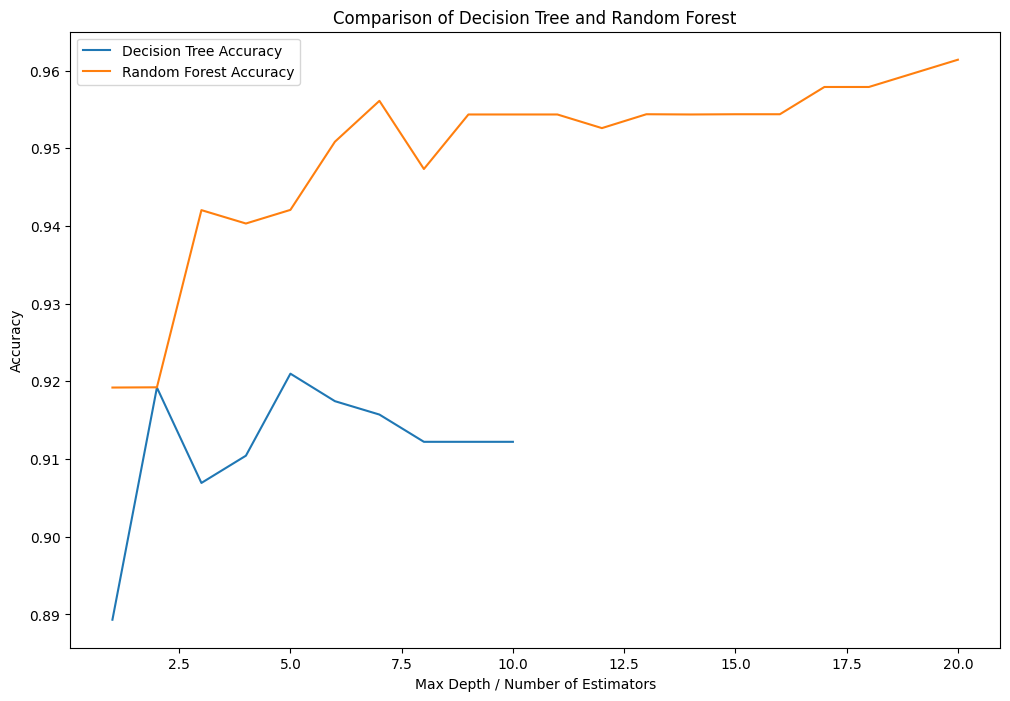

In [149]:
# Vary max depth for the Decision Tree
max_depth_values = np.arange(1, 11)

# List to store accuracy scores
decision_tree_accuracies = []
random_forest_accuracies = []

# Set random seed for reproducibility
seed = RANDOM_STATE

# Iterate over max_depth values for Decision Tree
for max_depth in max_depth_values:
    # Create DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)

    # Evaluate with 10-fold cross-validation
    decision_tree_accuracy = np.mean(cross_val_score(decision_tree, x, y, cv=10))
    decision_tree_accuracies.append(decision_tree_accuracy)

# Vary number of trees for Random Forest
n_estimators_values = np.arange(1, 21)

# Iterate over n_estimators values for Random Forest
for n_estimators in n_estimators_values:
    # Create RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=seed)

    # Evaluate with 10-fold cross-validation
    random_forest_accuracy = np.mean(cross_val_score(random_forest, x, y, cv=10))
    random_forest_accuracies.append(random_forest_accuracy)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depth_values, decision_tree_accuracies, label='Decision Tree Accuracy')
plt.plot(n_estimators_values, random_forest_accuracies, label='Random Forest Accuracy')
plt.xlabel('Max Depth / Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree and Random Forest')
plt.legend()
plt.show()


In [150]:
print("Decision Tree Accuracies:", decision_tree_accuracies)
print("Random Forest Accuracies:", random_forest_accuracies)

Decision Tree Accuracies: [0.8893170426065163, 0.9192042606516291, 0.9069235588972431, 0.9104323308270675, 0.9209899749373432, 0.9174498746867167, 0.9157268170426063, 0.9122180451127818, 0.9122180451127818, 0.9122180451127818]
Random Forest Accuracies: [0.9192042606516291, 0.919235588972431, 0.9420426065162906, 0.9403195488721805, 0.9420739348370928, 0.9508458646616541, 0.9561090225563911, 0.9473370927318296, 0.9543546365914788, 0.9543546365914788, 0.9543546365914788, 0.9526002506265664, 0.9543859649122807, 0.9543546365914788, 0.9543859649122807, 0.9543859649122807, 0.9578947368421054, 0.9578947368421051, 0.9596491228070174, 0.9614035087719298]


In [151]:
best_n_estimators_index = np.argmax(random_forest_accuracies)
best_n_estimators = n_estimators_values[best_n_estimators_index]

print(f"The best setting for n_estimators with respect to cross-validated accuracy: {best_n_estimators}")


The best setting for n_estimators with respect to cross-validated accuracy: 20


### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** Upon analysis of the plotted results, it is evident that the Random Forest curve consistently outperforms the Decision Tree curve across various values of n_estimators. This consistent superiority suggests that the Random Forest model, employing an ensemble approach, surpasses a single Decision Tree in terms of performance. This emphasizes the improved generalization and robustness provided by the ensemble method. Additionally, a more visual method of comparing the results can be implemented through code.

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** To find the setting of n_estimators that gave the best accuracy with respect to cross-validated accuracy, you can examine the random_forest_accuracies list and identify the index of the maximum value. Also, you can use code to get the accuracy: (20)

best_n_estimators_index = np.argmax(random_forest_accuracies)
best_n_estimators = n_estimators_values[best_n_estimators_index]

print(f"The best setting for n_estimators with respect to cross-validated accuracy: {best_n_estimators}")


### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

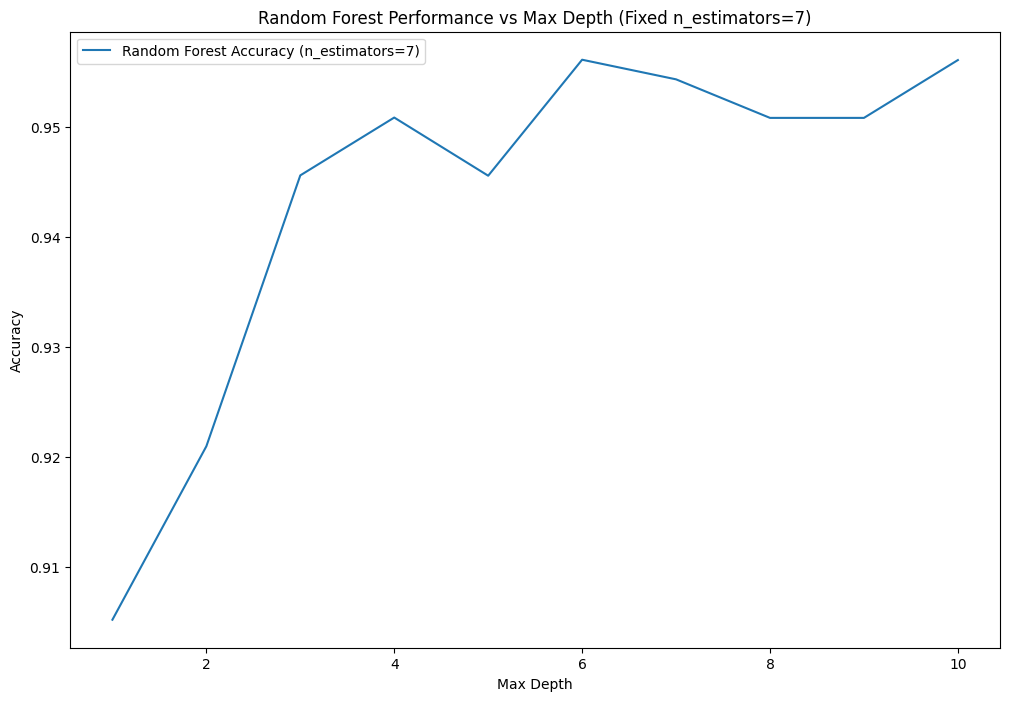

In [152]:
# Use the best setting for n_estimators from the previous analysis (answer to 3c)
best_n_estimators = best_max_depths[0]

# Vary max depth for the RandomForestClassifier
max_depth_values = np.arange(1, 11)

# List to store cross-validated accuracies
random_forest_accuracies_fixed_n_estimators = []

# Set random seed for reproducibility
seed = RANDOM_STATE

# Create RandomForestClassifier with fixed n_estimators
rf_classifier_fixed_n_estimators = RandomForestClassifier(n_estimators=best_n_estimators, random_state=seed)

# Iterate over max_depth values for RandomForestClassifier
for max_depth in max_depth_values:
    # Set the current max_depth value
    rf_classifier_fixed_n_estimators.set_params(max_depth=max_depth)

    # Evaluate with 10-fold cross-validation
    cross_val_accuracy_rf_fixed_n_estimators = np.mean(cross_val_score(rf_classifier_fixed_n_estimators, x, y, cv=10))
    random_forest_accuracies_fixed_n_estimators.append(cross_val_accuracy_rf_fixed_n_estimators)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(max_depth_values, random_forest_accuracies_fixed_n_estimators, label=f'Random Forest Accuracy (n_estimators={best_n_estimators})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title(f'Random Forest Performance vs Max Depth (Fixed n_estimators={best_n_estimators})')
plt.legend()
plt.show()


In [153]:
# Find the max_depth value(s) with the highest cross-validated accuracy in 2(b)ii
best_max_depths_2bii = [max_depth_values[i] for i, acc in enumerate(cross_val_accuracies) if acc == max(cross_val_accuracies)]

# Find the max_depth value(s) with the highest cross-validated accuracy in 3d
best_max_depths_3d = [max_depth_values[i] for i, acc in enumerate(random_forest_accuracies_fixed_n_estimators) if acc == max(random_forest_accuracies_fixed_n_estimators)]

# Compare the results
if best_max_depths_2bii == best_max_depths_3d:
    print(f"The optimal setting of max_depth is the same in 2(b)ii and 3d: {best_max_depths_2bii}")
else:
    print(f"The optimal setting of max_depth is different:")
    print(f"In 2(b)ii: {best_max_depths_2bii}")
    print(f"In 3d: {best_max_depths_3d}")


The optimal setting of max_depth is different:
In 2(b)ii: [5]
In 3d: [6]


### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** This comparison helps understand if the optimal depth setting remains consistent or varies when the number of estimators is fixed in a random forest classifier. (6)

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

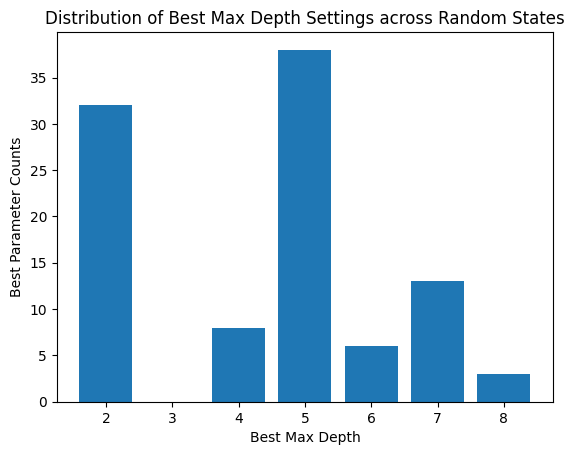

In [154]:
# Constants
random_states = np.arange(0, 100)
max_depth_values = np.arange(1, 11)

# Lists to store the best max depth for each random state
best_max_depths_per_state = []

# Iterate over random states
for random_state in random_states:
    # Lists to store accuracy scores for each max depth
    accuracies_per_depth = []

    # Iterate over max depth values
    for max_depth in max_depth_values:
        # Create DecisionTreeClassifier with the current max depth and random state
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

        # Calculate 10-fold cross-validation accuracy
        cross_val_accuracy = np.mean(cross_val_score(clf, x, y, cv=10))
        accuracies_per_depth.append(cross_val_accuracy)

    # Find the best max depth for the current random state
    best_max_depth = max_depth_values[np.argmax(accuracies_per_depth)]
    best_max_depths_per_state.append(best_max_depth)

# Plot the counts for the best max depth settings
unique, counts = np.unique(best_max_depths_per_state, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Best Max Depth')
plt.ylabel('Best Parameter Counts')
plt.title('Distribution of Best Max Depth Settings across Random States')
plt.show()


In [155]:
# Find the top two most frequent parameter settings
top_parameters = dict(zip(unique, counts))
sorted_top_parameters = sorted(top_parameters.items(), key=lambda x: x[1], reverse=True)[:2]

# Print the top two most frequent parameter settings
print(f"The top two most frequent parameter settings are:")
for param, count in sorted_top_parameters:
    print(f"Max Depth: {param}, Frequency: {count}")


The top two most frequent parameter settings are:
Max Depth: 5, Frequency: 38
Max Depth: 2, Frequency: 32


### (b)
What are the top two most frequent parameter settings?

**Student answer here:**
The top two most frequent parameter settings are:
Max Depth: 5, Frequency: 38
Max Depth: 2, Frequency: 32